# Smart Credit AI

## 1. Business Understanding

**Tujuan Bisnis**: * Mengurangi risiko kredit macet (Non-Performing Loan).

- Mempercepat waktu verifikasi dari hari ke hitungan detik.

- Menghilangkan bias subjektif dalam penilaian manual.

## 2. Data Understanding

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report, roc_auc_score, roc_curve

In [72]:
df = pd.read_csv("./data/loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [73]:
print("Informasi Dataset:")
df.info()

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [74]:
# Cek missing values
print("Missing values per fitur:")
df.isnull().sum()

Missing values per fitur:


loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

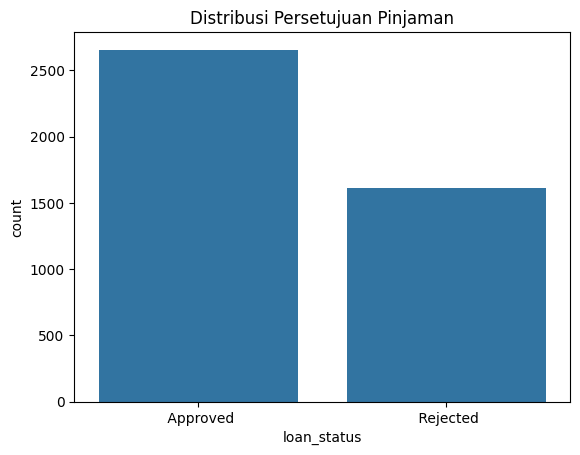

In [75]:
# Visualisasi Target: Loan Status
sns.countplot(x='loan_status', data=df)
plt.title('Distribusi Persetujuan Pinjaman')
plt.show()

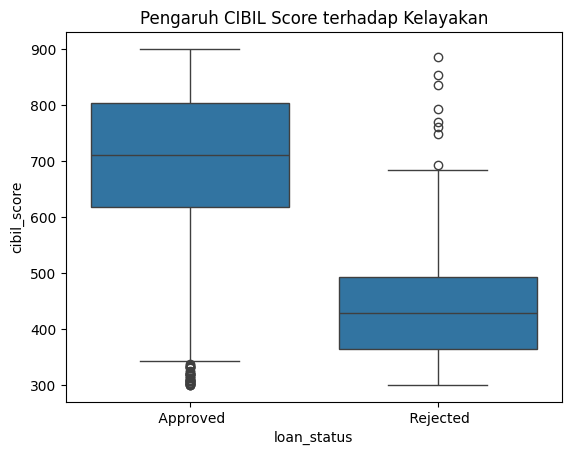

In [76]:
# Korelasi antara CIBIL Score dan Status Pinjaman
sns.boxplot(x='loan_status', y='cibil_score', data=df)
plt.title('Pengaruh CIBIL Score terhadap Kelayakan')
plt.show()

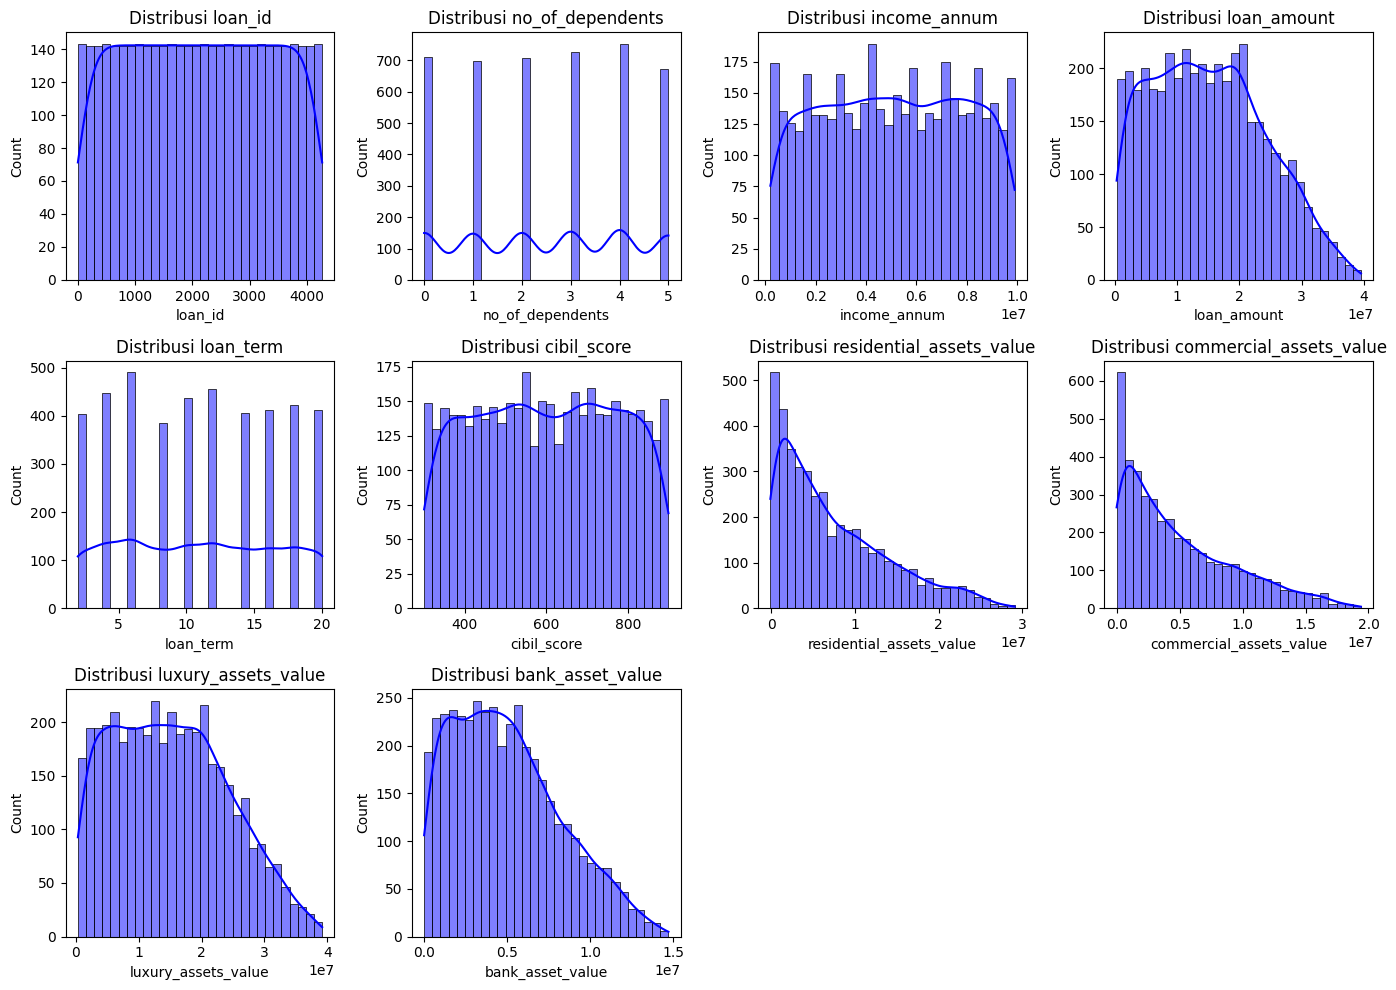

In [77]:
# Distribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color="blue")
    plt.title(f"Distribusi {column}")

plt.tight_layout()
plt.show()

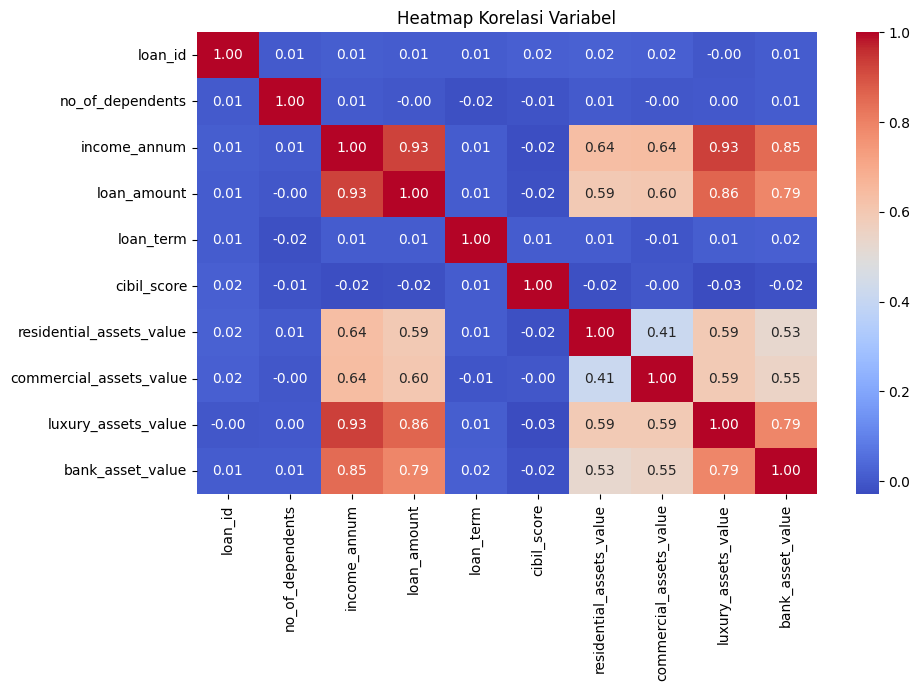

In [78]:
# Melihat korelasi
plt.figure(figsize=(10,6))
sns.heatmap(num_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Variabel')
plt.show()

In [79]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


## Analisis Statistik Deskriptif - Dataset

Berdasarkan tabel statistik deskriptif yang dihasilkan, berikut adalah poin-poin insight utama:

### 1. Deteksi Anomali & Kualitas Data
* **Aset Residensial Negatif:** Terdapat nilai minimum `-1.000000e+05` pada kolom `residential_assets_value`. Karena nilai aset tidak mungkin negatif, ini teridentifikasi sebagai *data entry error* yang perlu dibersihkan.
* **Skala Data:** Mayoritas data finansial (income, assets, loan amount) berada dalam skala jutaan (notasi ilmiah `e+06` dan `e+07`), yang menunjukkan dataset ini menggunakan satuan mata uang Rupiah.

### 2. Profil Risiko & Skor Kredit (CIBIL Score)
* **Rentang Skor:** Pemohon memiliki skor kredit antara **300 hingga 900**.
* **Rata-rata (Mean):** Berada di angka **599 (sekitar 600)**. 
* **Insight:** Distribusi skor kredit cukup tersebar merata. Angka 600 menunjukkan profil risiko "menengah". Perlu analisis lebih lanjut untuk melihat apakah skor di bawah 500 memiliki tingkat penolakan pinjaman yang lebih tinggi.

### 3. Kapasitas Keuangan & Pinjaman
* **Loan-to-Income Ratio:** * Rata-rata Pendapatan: ~5 Juta
    * Rata-rata Pinjaman: ~15 Juta
* **Insight:** Rata-rata pemohon mengajukan pinjaman sebesar **3x lipat dari pendapatan tahunan** mereka. Ini adalah rasio yang signifikan namun umum untuk pinjaman jangka panjang.

### 4. Komposisi Aset Pemohon
* **Aset Mewah vs Komersial:** Nilai rata-rata aset mewah (`luxury_assets_value` ~15,1 Juta) jauh lebih tinggi dibandingkan aset komersial (~4,9 Juta). 
* **Insight:** Pemohon dalam dataset ini secara umum memiliki profil kekayaan yang lebih condong ke aset pribadi/konsumtif daripada aset produktif (komersial).

### 5. Karakteristik Pinjaman
* **Tenor Pinjaman (`loan_term`):** Memiliki rentang **2 hingga 20 tahun** dengan rata-rata **11 tahun**. Berdasarkan skala jumlah pinjaman, satuan ini dipastikan dalam **Tahun**.
* **Tanggungan (`no_of_dependents`):** Pemohon rata-rata memiliki **2-3 tanggungan**, dengan jumlah maksimal 5 orang. Hal ini akan mempengaruhi *repayment capacity* (kemampuan bayar) setiap bulannya.

---

## 3. Data Preparation

In [80]:
# Strategi: Mengganti nilai negatif menjadi 0.
# (Asumsinya: Nilai negatif adalah error, dan aset tidak mungkin minus)

# Menampilkan statistik sebelum pembersihan untuk memastikan adanya nilai negatif
print("Statistik Aset Residensial Sebelum Pembersihan")
print(df['residential_assets_value'].describe())

# Cek berapa banyak data yang negatif
jumlah_negatif = (df['residential_assets_value'] < 0).sum()
print(f"\nJumlah data bernilai negatif: {jumlah_negatif}")

# Mengubah nilai negatif menjadi 0
df.loc[df['residential_assets_value'] < 0, 'residential_assets_value'] = 0

# Validasi: Pastikan nilai minimum sekarang adalah 0
print("\nNilai Minimum Setelah Pembersihan")
print(f"Min: {df['residential_assets_value'].min()}")

Statistik Aset Residensial Sebelum Pembersihan
count    4.269000e+03
mean     7.472617e+06
std      6.503637e+06
min     -1.000000e+05
25%      2.200000e+06
50%      5.600000e+06
75%      1.130000e+07
max      2.910000e+07
Name: residential_assets_value, dtype: float64

Jumlah data bernilai negatif: 28

Nilai Minimum Setelah Pembersihan
Min: 0


In [81]:
# Menjumlahkan semua jenis aset untuk melihat kekayaan total
df['total_assets'] = (df['residential_assets_value'] + 
                      df['commercial_assets_value'] + 
                      df['luxury_assets_value'] + 
                      df['bank_asset_value'])

In [82]:
# Mengukur beban pinjaman terhadap pendapatan tahunan
df['loan_to_income_ratio'] = df['loan_amount'] / df['income_annum']

In [83]:
# Mengukur seberapa besar jaminan aset menutupi jumlah pinjaman
df['asset_to_loan_ratio'] = df['total_assets'] / df['loan_amount']

In [84]:
# Menghapus kolom yang tidak relevan
df = df.drop(['loan_id', 'self_employed', 'education'], axis=1)

In [85]:
# Encoding: Mengubah teks menjadi angka
le = LabelEncoder()
df['loan_status'] = le.fit_transform(df['loan_status']) # Approved=0, Rejected=1

df.head()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets,loan_to_income_ratio,asset_to_loan_ratio
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,50700000,3.114583,1.695652
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,17000000,2.975610,1.393443
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1,57700000,3.263736,1.942761
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1,52700000,3.743902,1.716612
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1,55000000,2.469388,2.272727


In [86]:
# Split Data: Fitur (X) dan Target (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Pembagian data Train dan Test (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Cek distribusi kelas
print("Train distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest distribution:")
print(y_test.value_counts(normalize=True))

Train distribution:
loan_status
0    0.622155
1    0.377845
Name: proportion, dtype: float64

Test distribution:
loan_status
0    0.62217
1    0.37783
Name: proportion, dtype: float64


## 4. Modeling & Evaluation

### Objective
Membangun model machine learning untuk memprediksi **probabilitas risiko gagal bayar**
calon peminjam kredit.

Model **tidak digunakan sebagai pengambil keputusan final**, melainkan sebagai
alat bantu penilaian risiko (risk scoring).

### Target Variable
- loan_status
  - 1 = Rejected (High Risk)
  - 0 = Approved (Low Risk)

### Key Output
- Risk Score (probabilitas gagal bayar)
- Decision (Approved / Rejected) berbasis kebijakan (threshold)


In [87]:
from sklearn.pipeline import Pipeline

baseline_model = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

baseline_model.fit(X_train, y_train)

y_pred = baseline_model.predict(X_test)
y_proba = baseline_model.predict_proba(X_test)[:, 1] # Probabilitas kelas "Rejected"


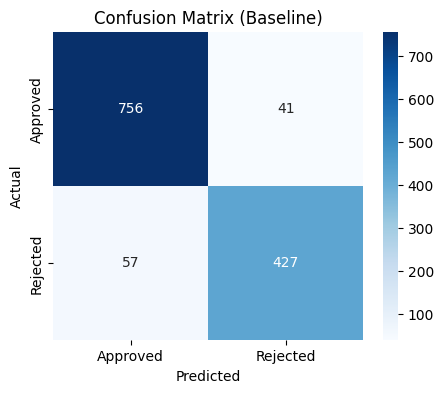

In [88]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Approved", "Rejected"],
            yticklabels=["Approved", "Rejected"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Baseline)")
plt.show()


In [89]:
# Classification report
print(classification_report(y_test, y_pred, target_names=["Approved", "Rejected"]))


              precision    recall  f1-score   support

    Approved       0.93      0.95      0.94       797
    Rejected       0.91      0.88      0.90       484

    accuracy                           0.92      1281
   macro avg       0.92      0.92      0.92      1281
weighted avg       0.92      0.92      0.92      1281



In [90]:
# ROC-AUC
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

ROC-AUC Score: 0.9728


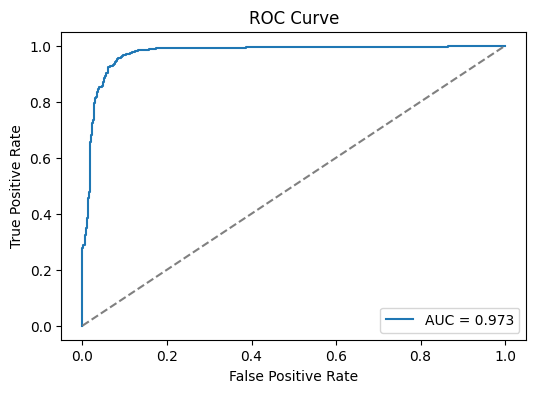

In [91]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


### Threshold Analysis (Decision-Aware Modeling)

Tujuan

Menentukan kebijakan keputusan berdasarkan risk appetite, bukan default ML (0.5).

#### 1. Generate Prediction Table

In [92]:
thresholds = np.arange(0.2, 0.81, 0.05)
records = []

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_t).ravel()

    records.append({
        "threshold": round(t, 2),
        "TP (Rejected→Rejected)": tp,
        "FP (Approved→Rejected)": fp,
        "FN (Rejected→Approved)": fn,
        "TN (Approved→Approved)": tn,
        "Recall_Rejected": tp / (tp + fn),
        "Approval_Rate": (tn + fn) / len(y_test)
    })

threshold_df = pd.DataFrame(records)
threshold_df

,threshold,TP (Rejected→Rejected),FP (Approved→Rejected),FN (Rejected→Approved),TN (Approved→Approved),Recall_Rejected,Approval_Rate
0,0.20,476,112,8,685,0.983471,0.540984
1,0.25,471,89,13,708,0.973140,0.562842
2,0.30,467,76,17,721,0.964876,0.576112
3,0.35,456,63,28,734,0.942149,0.594848
4,0.40,449,53,35,744,0.927686,0.608119
5,0.45,439,48,45,749,0.907025,0.619828
6,0.50,427,41,57,756,0.882231,0.634660
7,0.55,413,36,71,761,0.853306,0.649493
8,0.60,404,28,80,769,0.834711,0.662763
9,0.65,390,24,94,773,0.805785,0.676815


#### 2. Visualisasi Trade-off

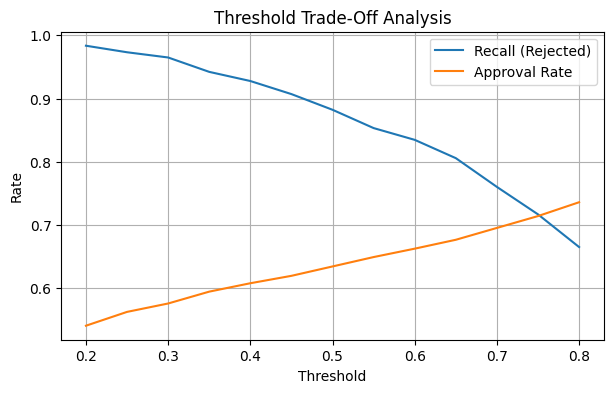

In [93]:
plt.figure(figsize=(7, 4))
plt.plot(threshold_df["threshold"], threshold_df["Recall_Rejected"], label="Recall (Rejected)")
plt.plot(threshold_df["threshold"], threshold_df["Approval_Rate"], label="Approval Rate")
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.title("Threshold Trade-Off Analysis")
plt.legend()
plt.grid(True)
plt.show()


#### Insight Threshold
- Threshold rendah → model konservatif (FN turun, approval turun)
- Threshold tinggi → approval naik, risiko FN naik

Pemilihan threshold **bukan keputusan teknis**, melainkan **kebijakan risiko**.

---

### Risk Score Calibration
Tujuan

Memastikan bahwa risk score = probabilitas nyata, bukan sekadar ranking.

#### 1. Calibration Curve

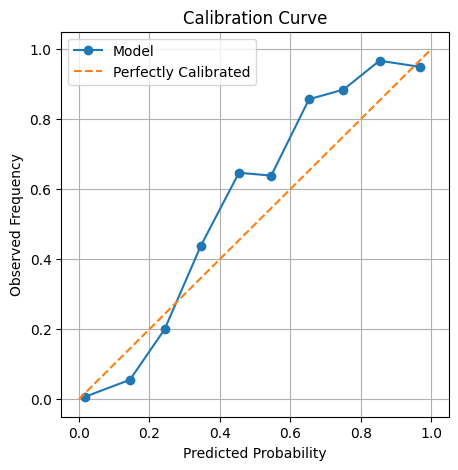

In [94]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(
    y_test,
    y_proba,
    n_bins=10,
    strategy="uniform"
)

plt.figure(figsize=(5, 5))
plt.plot(prob_pred, prob_true, marker="o", label="Model")
plt.plot([0, 1], [0, 1], linestyle="--", label="Perfectly Calibrated")
plt.xlabel("Predicted Probability")
plt.ylabel("Observed Frequency")
plt.title("Calibration Curve")
plt.legend()
plt.grid(True)
plt.show()


#### 2. Brier Score

In [95]:
from sklearn.metrics import brier_score_loss

brier = brier_score_loss(y_test, y_proba)
print(f"Brier Score: {brier:.4f}")


Brier Score: 0.0574


Berdasarkan analisis ambang batas, ambang batas 0,45 memberikan keseimbangan antara mitigasi risiko dan tingkat persetujuan, sehingga menghasilkan:

- Recall (Rejected) ≈ 91%
- Approval rate ≈ 62%

Ambang batas ini dipilih sebagai kebijakan keputusan default.

Model menunjukkan probabilistic calibration yang baik sehingga tidak diperlukan calibration correction tambahan.

---

### Feature Explainability

Tujuan

Membuka “kotak hitam” sebelum kebijakan diterapkan.

In [96]:
# Ambil nama fitur
feature_names = X.columns

# Ambil koefisien model
logreg = baseline_model.named_steps["logreg"]
coefficients = logreg.coef_[0]

feature_importance = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefficients,
    "abs_coefficient": np.abs(coefficients)
}).sort_values(by="abs_coefficient", ascending=False)

feature_importance.head(10)

,feature,coefficient,abs_coefficient
4,cibil_score,-4.113696,4.113696
3,loan_term,0.837023,0.837023
1,income_annum,0.637195,0.637195
10,loan_to_income_ratio,-0.547261,0.547261
7,luxury_assets_value,-0.359535,0.359535
9,total_assets,-0.181572,0.181572
0,no_of_dependents,0.090086,0.090086
11,asset_to_loan_ratio,0.075310,0.075310
6,commercial_assets_value,-0.051104,0.051104
8,bank_asset_value,-0.046589,0.046589


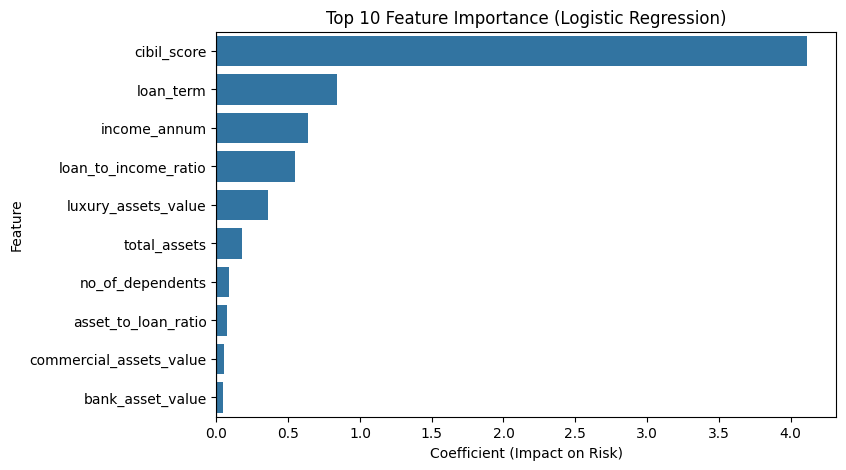

In [97]:

plt.figure(figsize=(8, 5))
sns.barplot(
    data=feature_importance.head(10),
    x="abs_coefficient",
    y="feature"
)
plt.axvline(0, color="black", linewidth=0.8)
plt.title("Top 10 Feature Importance (Logistic Regression)")
plt.xlabel("Coefficient (Impact on Risk)")
plt.ylabel("Feature")
plt.show()

### Ringkasan Penjelasan Fitur

Model ini mengidentifikasi skor kredit (CIBIL) sebagai penentu terkuat risiko kredit, dengan skor yang lebih tinggi secara signifikan mengurangi probabilitas gagal bayar.

Durasi pinjaman dan tingkat pendapatan juga berkontribusi pada penilaian risiko,
mencerminkan periode eksposur yang lebih panjang dan profil peminjam yang kompleks.

Fitur terkait aset memberikan informasi tambahan tetapi tidak
mendominasi proses pengambilan keputusan model, menunjukkan penggunaan fitur yang seimbang.
Secara keseluruhan, efek fitur selaras dengan pengetahuan domain dalam penilaian risiko kredit,
dan tidak ada bukti kebocoran fitur atau dominasi yang tidak realistis yang diamati.

## 5. Inference

### 1. Final Inference Function

In [98]:
DEFAULT_THRESHOLD = 0.45

def apply_policy(risk_score, threshold=DEFAULT_THRESHOLD):
    if risk_score >= threshold:
        return "Rejected"
    elif risk_score >= 0.30:
        return "Manual Review"
    else:
        return "Approved"


In [99]:
def predict_credit_risk(applicant_df, threshold=DEFAULT_THRESHOLD):
    """
    applicant_df : pd.DataFrame (1 row, same columns as training features)

    return : dict (JSON-ready)
    """

    # 1. Predict risk score
    risk_score = baseline_model.predict_proba(applicant_df)[0, 1]

    # 2. Apply decision policy
    decision = apply_policy(risk_score, threshold)

    # 3. Human-readable message
    if decision == "Approved":
        message = "Low risk profile based on provided data."
    elif decision == "Manual Review":
        message = "Moderate risk profile. Manual review recommended."
    else:
        message = "High risk profile based on provided data."

    return {
        "decision": decision,
        "risk_score": round(float(risk_score), 4),
        "message": message
    }


### Test cepat

In [100]:
sample_applicant = X_test.iloc[[0]]
predict_credit_risk(sample_applicant)

{'decision': 'Rejected',
 'risk_score': 0.9564,
 'message': 'High risk profile based on provided data.'}

### 2. Policy Simulation

#### Definisi Kebijakan

In [101]:
POLICIES = {
    "Conservative": 0.30,
    "Balanced": 0.45,
    "Aggressive": 0.65
}

#### Simulasi Kebijakan di Test Set

In [102]:
simulation_results = []

risk_scores = baseline_model.predict_proba(X_test)[:, 1]

for policy_name, threshold in POLICIES.items():
    decisions = [apply_policy(score, threshold) for score in risk_scores]
    decisions = pd.Series(decisions)

    simulation_results.append({
        "Policy": policy_name,
        "Threshold": threshold,
        "Approval-Like Rate": (decisions != "Rejected").mean(),
        "Manual Review Rate": (decisions == "Manual Review").mean(),
        "Rejection Rate": (decisions == "Rejected").mean()
    })

policy_simulation_df = pd.DataFrame(simulation_results)
policy_simulation_df


,Policy,Threshold,Approval-Like Rate,Manual Review Rate,Rejection Rate
0,Conservative,0.30,0.576112,0.000000,0.423888
1,Balanced,0.45,0.619828,0.043716,0.380172
2,Aggressive,0.65,0.676815,0.100703,0.323185


### Policy Simulation Insight

Kebijakan konservatif meminimalkan risiko kredit dengan menolak lebih banyak pemohon,
sementara kebijakan agresif meningkatkan tingkat persetujuan dengan mengorbankan potensi risiko gagal bayar yang lebih tinggi.

Kebijakan seimbang memberikan kompromi yang wajar dan dipilih
sebagai kebijakan operasional standar untuk Smart Credit AI.

## Export Model

In [103]:
import joblib

joblib.dump(baseline_model, "smart_credit_model.joblib")

['smart_credit_model.joblib']

In [104]:
model_metadata = {
    "model_name": "Smart Credit AI",
    "algorithm": "Logistic Regression (Pipeline)",
    "threshold": 0.45,
    "policies": {
        "approved": "risk_score < 0.30",
        "manual_review": "0.30 <= risk_score < 0.45",
        "rejected": "risk_score >= 0.45"
    },
    "metrics": {
        "roc_auc": 0.9727,
        "brier_score": 0.0575
    }
}

joblib.dump(model_metadata, "smart_credit_metadata.joblib")


['smart_credit_metadata.joblib']

In [105]:
# Test model yang sudah di export
loaded_model = joblib.load("smart_credit_model.joblib")

loaded_model.predict_proba(X_test.iloc[[0]])

array([[0.04359646, 0.95640354]])